In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV,train_test_split
from statsmodels.formula.api import glm
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Project Task: Week 1

####  1. Import and aggregate data:
##### a. Collect information related to flights, airports (e.g., type of airport and elevation), and runways (e.g., length_ft, width_ft, surface, and number of runways). Gather all fields you believe might cause avoidable delays in one dataset.

In [2]:
airlines= pd.read_excel("Airlines.xlsx")
airports= pd.read_excel("airports.xlsx")
runways= pd.read_excel("runways.xlsx")

In [3]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [5]:
runways.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [8]:
airport_runway= pd.merge(airports,runways, left_on="ident",right_on="airport_ident", how="left")
airport_runway.head()

,id_x,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,...,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,...,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,...,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,...,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN


In [9]:
airport_runway.columns

Index(['id_x', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords', 'id_y',
       'airport_ref', 'airport_ident', 'length_ft', 'width_ft', 'surface',
       'lighted', 'closed', 'le_ident', 'le_latitude_deg', 'le_longitude_deg',
       'le_elevation_ft', 'le_heading_degT', 'le_displaced_threshold_ft',
       'he_ident', 'he_latitude_deg', 'he_longitude_deg', 'he_elevation_ft',
       'he_heading_degT', 'he_displaced_threshold_ft'],
      dtype='object')

In [10]:
runway_count= airport_runway.groupby(["airport_ident"])[["id_y"]].count().sort_values(by = "id_y", ascending=False).reset_index()
runway_count.head()

,airport_ident,id_y
0,KORD,11
1,KNHU,10
2,JRA,9
3,TA12,8
4,SXS,8


In [11]:
airportrun_count= pd.merge(airports,runway_count, left_on="ident",right_on="airport_ident", how="left")[["iata_code","type","elevation_ft","id_y"]]
airportrun_count.rename(columns={"id_y":"runway_count"}, inplace= True)
airportrun_count.head()

,iata_code,type,elevation_ft,runway_count
0,NaN,heliport,11.0,1.0
1,NaN,small_airport,3435.0,NaN
2,NaN,small_airport,450.0,1.0
3,NaN,small_airport,820.0,1.0
4,NaN,closed,237.0,1.0


In [12]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [13]:
comb_data= pd.merge(airlines, airportrun_count, left_on="AirportFrom",right_on="iata_code", how="left")
new_names= list(comb_data[airportrun_count.columns].columns + "_source_airport")
old_names= list(comb_data[airportrun_count.columns].columns)
comb_data.rename(columns = {old:new for old,new in zip(old_names, new_names)},inplace=True)
comb_data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,iata_code_source_airport,type_source_airport,elevation_ft_source_airport,runway_count_source_airport
0,1,CO,269,SFO,IAH,3,15,205,1,SFO,large_airport,13.0,4.0
1,2,US,1558,PHX,CLT,3,15,222,1,PHX,large_airport,1135.0,3.0
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX,large_airport,125.0,4.0
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO,large_airport,13.0,4.0
4,5,AS,108,ANC,SEA,3,30,202,0,ANC,large_airport,152.0,3.0


In [14]:
combined_data= pd.merge(comb_data, airportrun_count, left_on="AirportTo",right_on="iata_code", how="left")
new_names=list(combined_data[airportrun_count.columns].columns +"_dest_airport")
old_names= list(combined_data[airportrun_count.columns].columns)
combined_data.rename(columns={old:new for old, new in zip (old_names,new_names)}, inplace=True)
combined_data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,iata_code_source_airport,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,iata_code_dest_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,SFO,large_airport,13.0,4.0,IAH,large_airport,97.0,5.0
1,2,US,1558,PHX,CLT,3,15,222,1,PHX,large_airport,1135.0,3.0,CLT,large_airport,748.0,4.0
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX,large_airport,125.0,4.0,DFW,large_airport,607.0,7.0
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO,large_airport,13.0,4.0,DFW,large_airport,607.0,7.0
4,5,AS,108,ANC,SEA,3,30,202,0,ANC,large_airport,152.0,3.0,SEA,large_airport,433.0,4.0


In [15]:
combined_data.drop(columns = list(combined_data.columns[combined_data.columns.str.startswith("iata_code")]), inplace=True)
combined_data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0


##### b. When it comes to on-time arrivals, different airlines perform differently based on the amount of experience they have. The major airlines in this field include US Airways Express (founded in 1967) Continental Airlines (founded in 1934), and Express Jet (founded in 19860. Pull such information specific to various airlines from the Wikipedia page link given below.
https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States.

In [16]:
url="https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States"
r = requests.get(url)
soup=BeautifulSoup(r.text, "lxml")
my_table=soup.find_all ("table",{"class":"wikitable"})

In [17]:
len(my_table)

7

In [18]:
airport_year=[]
for table in my_table:
    table=pd.read_html(str(table))
    table=pd.DataFrame(table[0])
    airport_year.append(table)

In [19]:
airport_wikilist=pd.concat(airport_year)

In [20]:
 airport_wikilist.head()

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, Secondary hubs",Founded,Notes,"Primary Hubs, Secondary Hubs"
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/TacomaAnchoragePortland (OR)San Franci...,1932.0,Founded as McGee Airways and commenced operati...,NaN
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las VegasCincinnatiFort Walton BeachIndianapol...,1997.0,Founded as WestJet Express and commenced opera...,NaN
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort WorthCharlotteChicago-O'HareLos An...,1926.0,Founded as American Airways and commenced oper...,NaN
3,Avelo Airlines,NaN,XP,VXP,AVELO,BurbankNew HavenOrlandoRaleigh/DurhamWilmingto...,1987.0,First did business as Casino Express Airlines ...,NaN
4,Breeze Airways,NaN,MX,MXY,MOXY,CharlestonHartfordNew OrleansNorfolkProvidence...,2018.0,NaN,NaN


##### c. You should then get all the information gathered so far in one place.

In [21]:
combined_data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0


In [22]:
year_airport=pd.merge(combined_data,airport_wikilist[["Founded","IATA"]],left_on="Airline", right_on="IATA",how="left")
year_airport.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,IATA
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,NaN,NaN
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,NaN,NaN
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,1926.0,AA
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,1926.0,AA
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,1932.0,AS


In [23]:
year_airport.drop(columns=["IATA"], inplace= True)
year_airport.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,NaN
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,NaN
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,1926.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,1926.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,1932.0


##### d. The total passenger traffic may also contribute to flight delays. The term hub refers to busy commercial airports. Large hubs are airports that account for at least 1 percent of the total passenger enplanements in the United States. Airports that account for 0.25 percent to 1 percent of total passenger enplanements are considered medium hubs. Pull passenger traffic data from the Wikipedia page given below using web scraping and collate it in a table.
https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States


In [24]:
url="https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States"
r=requests.get(url).text
soup=BeautifulSoup(r,"lxml")
my_table1=soup.find_all("table",{"class":"wikitable"})

In [25]:
airport_hub={}
i=0
for table in my_table1:
    airport_hub[i] = pd.read_html(str(table))
    airport_hub[i]=pd.DataFrame(airport_hub[i][0])
    i+=1

In [26]:
large_hub=airport_hub[0].copy()
medium_hub= airport_hub[1].copy()

In [27]:
large_hub.insert(loc=1, column="Hub_type", value="large")
medium_hub.insert(loc=1, column="Hub_type", value="medium")

In [28]:
large_hub.head()

,Rank(2021),Hub_type,Airports (large hubs),IATACode,Major cities served,State,2021[3],2020[4],2019[5],2018[6],...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,large,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010,20559866,53505795,51865797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,large,Dallas/Fort Worth International Airport,DFW,Dallas & Fort Worth,TX,30005266,18593421,35778573,32821799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,large,Denver International Airport,DEN,Denver,CO,28645527,16243216,33592945,31362941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,large,O'Hare International Airport,ORD,Chicago,IL,26350976,14606034,40871223,39873927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,large,Los Angeles International Airport,LAX,Los Angeles,CA,23663410,14055777,42939104,42624050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
medium_hub.head()

Rank Hub_type Rank change                                      Airport name  \
  Rank          Rank change                                      Airport name   
0    1   medium         NaN  Hartsfield–Jackson Atlanta International Airport   
1    2   medium         NaN           Dallas/Fort Worth International Airport   
2    3   medium         NaN                      Denver International Airport   
3    4   medium         NaN                      O'Hare International Airport   
4    5   medium         NaN                 Los Angeles International Airport   

                  Location IATA Code    Traffic                Aircraft  \
                  Location IATA Code Passengers % chg.2019/20 Movements   
0    College Park, Georgia       ATL   93699630          23.8       NaN   
1            Irving, Texas       DFW   73362946          17.4       NaN   
2         Denver, Colorado       DEN   69286461          17.8       NaN   
3        Chicago, Illinois       ORD   68340619          26.5       NaN   
4  Los Angeles, California       LAX   65924298          37.3       NaN   

                 
  % chg.2019/20  
0           0.0  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [ ]:
# we have to remove the special character

In [30]:
temp_column = large_hub.columns.str.split("[([]").str[0].str.strip().str.lower().str.replace(" ","_").values
temp_column[list(map(lambda x:x.isnumeric(), temp_column))]= "data_" +temp_column[list(map(lambda x:x.isnumeric(), temp_column))]
large_hub.columns=temp_column
large_hub.columns

Index(['rank', 'hub_type', 'airports', 'iatacode', 'major_cities_served',
       'state', 'data_2021', 'data_2020', 'data_2019', 'data_2018',
       'data_2017', 'data_2016', 'data_2015', 'data_2014', 'data_2013',
       'data_2012', 'unnamed:_15', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18',
       'unnamed:_19', 'unnamed:_20', 'unnamed:_21', 'unnamed:_22',
       'unnamed:_23', 'unnamed:_24', 'unnamed:_25', 'unnamed:_26'],
      dtype='object')

In [31]:
column_temp= medium_hub.columns.str.split("[([]").str[0].str.strip().str.lower().str.replace(" ","_").values
column_temp[list(map(lambda x:x.isnumeric(),column_temp))] = "data_" + column_temp[list(map(lambda x: x.isnumeric(), column_temp))]
medium_hub.columns = column_temp
medium_hub.columns

AttributeError: Can only use .str accessor with Index, not MultiIndex

In [32]:
large_hub.rename(columns={"major_cities_served":"city_served"}, inplace= True)

In [33]:
large_hub.columns

Index(['rank', 'hub_type', 'airports', 'iatacode', 'city_served', 'state',
       'data_2021', 'data_2020', 'data_2019', 'data_2018', 'data_2017',
       'data_2016', 'data_2015', 'data_2014', 'data_2013', 'data_2012',
       'unnamed:_15', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18',
       'unnamed:_19', 'unnamed:_20', 'unnamed:_21', 'unnamed:_22',
       'unnamed:_23', 'unnamed:_24', 'unnamed:_25', 'unnamed:_26'],
      dtype='object')

In [34]:
final_hub_data= pd.concat([large_hub,medium_hub])

In [35]:
final_hub_data.head()

,rank,hub_type,airports,iatacode,city_served,state,data_2021,data_2020,data_2019,data_2018,...,"(Rank, Rank)","(Hub_type, )","(Rank change, Rank change)","(Airport name, Airport name)","(Location, Location)","(IATA Code, IATA Code)","(Traffic, Passengers)","(Traffic, % chg.2019/20)","(Aircraft, Movements)","(Aircraft, % chg.2019/20)"
0,1.0,large,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,GA,36676010.0,20559866.0,53505795.0,51865797.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,large,Dallas/Fort Worth International Airport,DFW,Dallas & Fort Worth,TX,30005266.0,18593421.0,35778573.0,32821799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,large,Denver International Airport,DEN,Denver,CO,28645527.0,16243216.0,33592945.0,31362941.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,large,O'Hare International Airport,ORD,Chicago,IL,26350976.0,14606034.0,40871223.0,39873927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,large,Los Angeles International Airport,LAX,Los Angeles,CA,23663410.0,14055777.0,42939104.0,42624050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
year_airport.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,NaN
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,NaN
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,1926.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,1926.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,1932.0


In [37]:
combined_year_hub = pd.merge(year_airport,
                             final_hub_data[["iatacode","data_2019"]], left_on="AirportFrom",right_on="iatacode", how="left")

In [38]:
combined_year_hub.rename(columns={"iatacode":"iatacode_source","data_2019":"data_2019_source_airport"}, inplace= True)

In [39]:
combined_year_hub= pd.merge(combined_year_hub,
                            final_hub_data[["iatacode","data_2019"]],left_on="AirportTo",right_on="iatacode", how="left")

In [40]:
combined_year_hub.rename(columns={"iatacode":"iatacode_dest","data_2019":"data_2019_dest_airport"}, inplace=True)

In [41]:
combined_year_hub= combined_year_hub.loc[:,~combined_year_hub.columns.str.startswith("iatacode")].copy()

In [42]:
combined_year_hub.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,NaN,NaN,NaN
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,NaN,21421031.0,24199688.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,1926.0,42939104.0,35778573.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,1926.0,NaN,35778573.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,1932.0,5144467.0,25001762.0


#### 2. You should then examine the missing values in each field, perform missing value treatment, and justify your actions.

In [43]:
combined_year_hub.isnull().sum().sort_values(ascending=False)

data_2019_source_airport       199062
data_2019_dest_airport         198957
Founded                         88440
elevation_ft_source_airport        31
runway_count_dest_airport          31
elevation_ft_dest_airport          31
type_dest_airport                  31
runway_count_source_airport        31
type_source_airport                31
Airline                             0
Delay                               0
Length                              0
Time                                0
DayOfWeek                           0
AirportTo                           0
AirportFrom                         0
Flight                              0
id                                  0
dtype: int64

In [ ]:
# missing value treatment for runway, elevation_ft and type

In [44]:
combined_year_hub[combined_year_hub.type_source_airport.isna()].AirportFrom.unique()

array(['CYS'], dtype=object)

In [45]:
combined_year_hub[combined_year_hub.type_dest_airport.isna()].AirportTo.unique()

array(['CYS'], dtype=object)

In [46]:
# in both the colmn common missing value is CYS so we have to check the value usingdata dictionory and exctract the information about CYS

In [47]:
data_dict=pd.read_excel("Data Dictionary.xlsx", sheet_name="airlines", header=29, usecols=([0,1]))

In [48]:
data_dict.head()

,Aiport ID,Description
0,ABE,RAF Calveley
1,ABE,Bisho Airport
2,ABE,Beica Airport
3,ABE,Lehigh Valley International Airport
4,ABE,Bethel Airport


In [49]:
name= data_dict[data_dict["Aiport ID"]=="CYS"].Description.values[0]
name.lower()

'cheyenne regional jerry olson field'

In [50]:
airports.head(2)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN


In [51]:
air_miss= airports.loc[name.lower()==airports.name.str.lower(),["ident","name","iata_code","type","elevation_ft"]]

In [52]:
air_miss.head()

,ident,name,iata_code,type,elevation_ft
34675,KCYS,Cheyenne Regional Jerry Olson Field,NaN,medium_airport,6159.0


In [53]:
runways.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [54]:
air_miss_comb= pd.merge(air_miss, runways[["id","airport_ident"]],left_on="ident", right_on="airport_ident", how="left")

In [55]:
air_miss_comb.head()

,ident,name,iata_code,type,elevation_ft,id,airport_ident
0,KCYS,Cheyenne Regional Jerry Olson Field,NaN,medium_airport,6159.0,245040,KCYS
1,KCYS,Cheyenne Regional Jerry Olson Field,NaN,medium_airport,6159.0,245041,KCYS


In [56]:
runway_count= air_miss_comb.groupby("ident")[["id"]].count().sort_values(by="id", ascending=False).reset_index()
runway_count.head()

,ident,id
0,KCYS,2


In [57]:
airmiss_count_comb=pd.merge(air_miss,runway_count).rename(columns={"id":"runway_count"})[["iata_code","type","elevation_ft","runway_count"]]
airmiss_count_comb

,iata_code,type,elevation_ft,runway_count
0,NaN,medium_airport,6159.0,2


In [58]:
combined_year_hub.loc[combined_year_hub.AirportFrom == "CYS","type_source_airport"] = airmiss_count_comb.type.values[0]
combined_year_hub.loc[combined_year_hub.AirportFrom == "CYS","elevation_ft_source_airport"] = airmiss_count_comb.elevation_ft.values[0]
combined_year_hub.loc[combined_year_hub.AirportFrom == "CYS","runway_count_source_airport"] = airmiss_count_comb.runway_count.values[0]
combined_year_hub.loc[combined_year_hub.AirportTo == "CYS","type_dest_airport"] = airmiss_count_comb.type.values[0]
combined_year_hub.loc[combined_year_hub.AirportTo == "CYS","elevation_ft_dest_airport"] = airmiss_count_comb.elevation_ft.values[0]
combined_year_hub.loc[combined_year_hub.AirportTo == "CYS","runway_count_dest_airport"] = airmiss_count_comb.runway_count.values[0]

In [59]:
combined_year_hub.isna().sum().sort_values(ascending=False)

data_2019_source_airport       199062
data_2019_dest_airport         198957
Founded                         88440
Airline                             0
runway_count_dest_airport           0
elevation_ft_dest_airport           0
type_dest_airport                   0
runway_count_source_airport         0
elevation_ft_source_airport         0
id                                  0
Delay                               0
Length                              0
Time                                0
DayOfWeek                           0
AirportTo                           0
AirportFrom                         0
Flight                              0
type_source_airport                 0
dtype: int64

In [ ]:
# missing value treatment for Founded

In [60]:
founded_miss = combined_year_hub[combined_year_hub.Founded.isna()].Airline.unique()
founded_miss

array(['CO', 'US', 'EV'], dtype=object)

In [61]:
airline_dict = pd.read_excel("Data Dictionary.xlsx", sheet_name="airlines",header=10, usecols = ([0,1]))
airline_dict.head()

,Airlines ID,Description
0,WN,Southwest
1,DL,Delta
2,OO,Skywest
3,AA,American Airlines
4,MQ,Envoy


In [62]:
print(airline_dict[airline_dict["Airlines ID"].isin(["CO","US","EV"])])

  Airlines ID                        Description
5          US  PSA (initially US Airway Express)
7          EV                         ExpressJet
9          CO     United Airlines (initially CO)


we have to extract the year of founded from the google using above id and name
US = 1967
EV = 1986
CO = 1928

In [63]:
miss_found_value= {"US" : 1967, "EV" : 1986, "CO" : 1928}

In [66]:
for aline in founded_miss:
    combined_year_hub.loc[(combined_year_hub.Founded.isna()) &
                      (combined_year_hub.Airline == aline), "Founded"] = miss_found_value[aline]

In [67]:
(combined_year_hub.isna().sum().sort_values(ascending = False)/combined_year_hub.shape[0])*100

data_2019_source_airport       35.619806
data_2019_dest_airport         35.601018
Airline                         0.000000
Founded                         0.000000
runway_count_dest_airport       0.000000
elevation_ft_dest_airport       0.000000
type_dest_airport               0.000000
runway_count_source_airport     0.000000
elevation_ft_source_airport     0.000000
id                              0.000000
Delay                           0.000000
Length                          0.000000
Time                            0.000000
DayOfWeek                       0.000000
AirportTo                       0.000000
AirportFrom                     0.000000
Flight                          0.000000
type_source_airport             0.000000
dtype: float64

In [ ]:
# missing value treatment on data_2019

In [68]:
med_value_sorce= combined_year_hub.groupby("type_source_airport")[["data_2019_source_airport"]].median()
med_value_sorce.head()

,data_2019_source_airport
type_source_airport,
large_airport,24199688.0
medium_airport,5153276.0
small_airport,NaN


In [69]:
for typ in combined_year_hub.type_source_airport.unique():
    combined_year_hub.loc[(combined_year_hub.type_source_airport == typ) &(combined_year_hub.data_2019_source_airport.isna()),"data_2019_source_airport"] = med_value_sorce.loc[typ].values[0]

In [70]:
med_value_dest = combined_year_hub.groupby("type_dest_airport")[["data_2019_dest_airport"]].median()
med_value_dest

,data_2019_dest_airport
type_dest_airport,
large_airport,24562271.0
medium_airport,5153276.0
small_airport,NaN


In [71]:
for types in combined_year_hub.type_dest_airport.unique():
    combined_year_hub.loc[(combined_year_hub.type_dest_airport == types) &(combined_year_hub.data_2019_dest_airport.isna()),"data_2019_dest_airport"] = med_value_dest.loc[types].values[0]

In [73]:
(combined_year_hub.isna().sum().sort_values(ascending = False))/combined_year_hub.shape[0]*100

data_2019_source_airport       0.209895
data_2019_dest_airport         0.208642
Airline                        0.000000
Founded                        0.000000
runway_count_dest_airport      0.000000
elevation_ft_dest_airport      0.000000
type_dest_airport              0.000000
runway_count_source_airport    0.000000
elevation_ft_source_airport    0.000000
id                             0.000000
Delay                          0.000000
Length                         0.000000
Time                           0.000000
DayOfWeek                      0.000000
AirportTo                      0.000000
AirportFrom                    0.000000
Flight                         0.000000
type_source_airport            0.000000
dtype: float64

In [ ]:
# missing values percentage is 0.22% so we can simply eleminate that rows

In [74]:
combined_year_hub.shape

(558852, 18)

In [75]:
combined_year_hub.dropna(inplace=True)
combined_year_hub.shape

(556513, 18)

In [76]:
combined_year_hub.isna().sum()

id                             0
Airline                        0
Flight                         0
AirportFrom                    0
AirportTo                      0
DayOfWeek                      0
Time                           0
Length                         0
Delay                          0
type_source_airport            0
elevation_ft_source_airport    0
runway_count_source_airport    0
type_dest_airport              0
elevation_ft_dest_airport      0
runway_count_dest_airport      0
Founded                        0
data_2019_source_airport       0
data_2019_dest_airport         0
dtype: int64

#### 3. Perform data visualization and share your insights on the following points:


##### a. According to the data provided, approximately 70% of Southwest Airlines flights are delayed. Visualize it to compare it with the data of other airlines.

In [78]:
airline_dict.head()

,Airlines ID,Description
0,WN,Southwest
1,DL,Delta
2,OO,Skywest
3,AA,American Airlines
4,MQ,Envoy


In [79]:
print(airline_dict.loc[airline_dict["Description"].str.strip().str.lower() =="southwest", "Airlines ID"].values[0])

WN


In [80]:
combined_year_hub.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,1928.0,24199688.0,24562271.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,1967.0,21421031.0,24199688.0


In [82]:
round(combined_year_hub[combined_year_hub.Airline == "WN"].Delay.sum()/combined_year_hub[combined_year_hub.Airline == "WN"].Delay.size*100)

70

In [83]:
def percent_Delay(x):
    return round(x.sum()/x.size * 100,2)

In [84]:
delay_perc = combined_year_hub.groupby('Airline')['Delay'].agg(percent_Delay)
delay_perc = delay_perc.reset_index()

In [85]:
plot_data = pd.merge(delay_perc, airline_dict, left_on = 'Airline',
                     right_on = 'Airlines ID', how = 'left')[['Airline','Description', 'Delay']]
plot_data

,Airline,Description,Delay
0,9E,Endeavor,39.78
1,AA,American Airlines,38.57
2,AS,Alaska,34.25
3,B6,Jetblue,46.62
4,CO,United Airlines (initially CO),56.58
5,DL,Delta,45.01
6,EV,ExpressJet,40.35
7,F9,Frontier,45.48
8,HA,Hawaiian,32.02
9,MQ,Envoy,34.82


In [86]:
import matplotlib.pyplot as plt

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


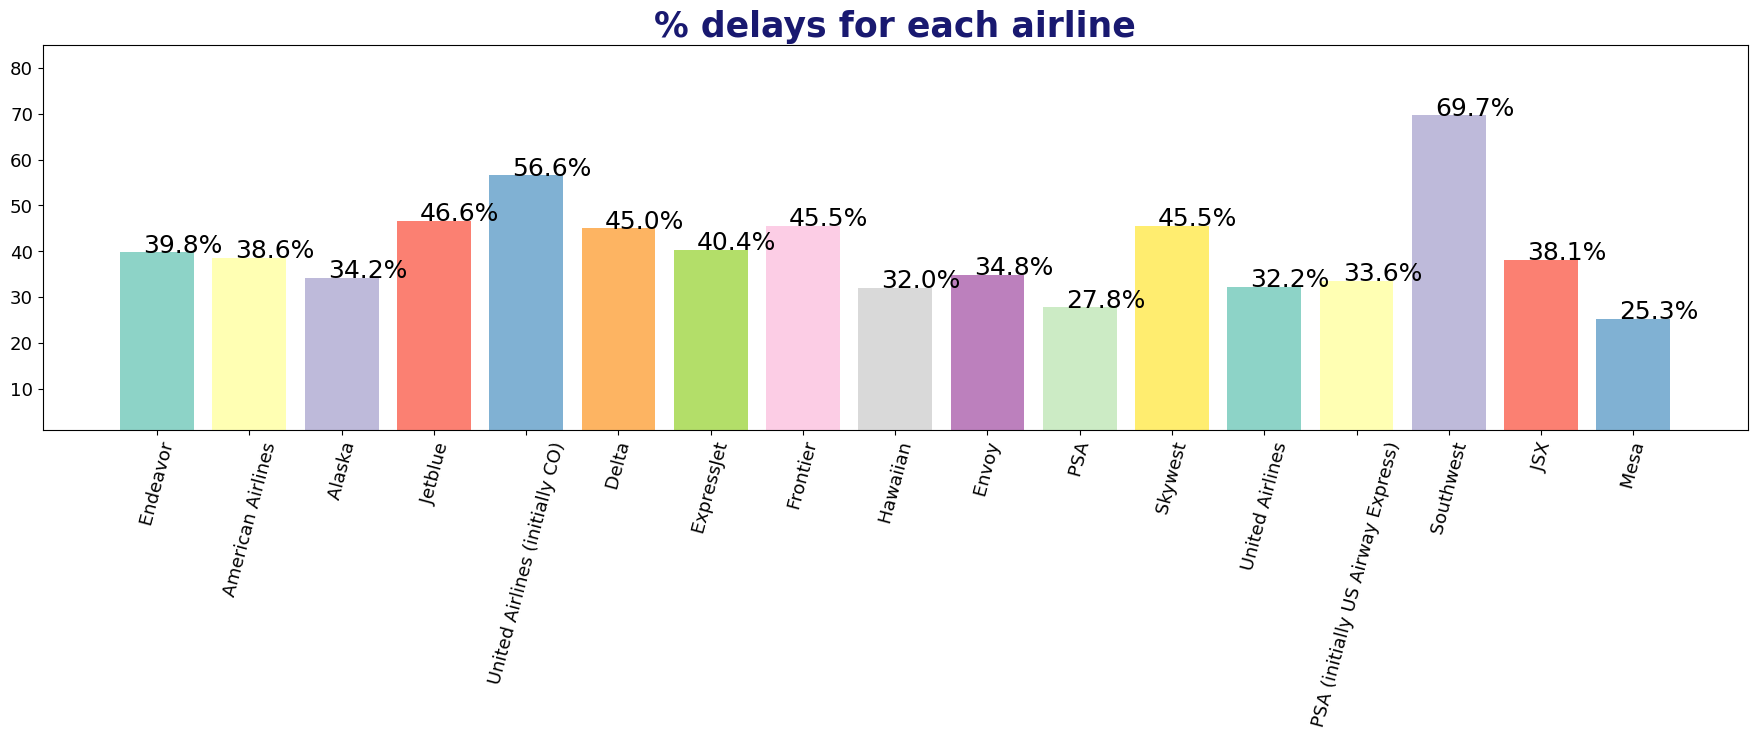

In [87]:
plt.figure(figsize = (22,5))
plt.bar(plot_data.Description, height = plot_data.Delay, color = plt.get_cmap('Set3').colors)
for v, idx in zip(plot_data.Delay.values,plot_data.index ):
    plt.annotate('{:.1f}%'.format(v), xy = (idx-0.15, v), size = 18, family ='times')
    plt.ylim(1,85)
    plt.xticks(size = 13, rotation = 75)
    plt.yticks(size = 13)
    plt.title('% delays for each airline', size = 25, color = 'midnightblue',weight = 'heavy', family = 'times')
plt.show()

##### b. Flights were delayed on various weekdays. Which day of the week is the safest for travel?

In [88]:
combined_year_hub.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,1928.0,24199688.0,24562271.0
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,1967.0,21421031.0,24199688.0
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,1926.0,42939104.0,35778573.0
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,1926.0,24199688.0,35778573.0
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,1932.0,5144467.0,25001762.0


In [89]:
delay_perc_weekday = combined_year_hub.groupby('DayOfWeek')['Delay'].agg(percent_Delay)
delay_perc_weekday

DayOfWeek
1    47.21
2    45.24
3    47.49
4    45.71
5    42.52
6    40.45
7    45.60
Name: Delay, dtype: float64

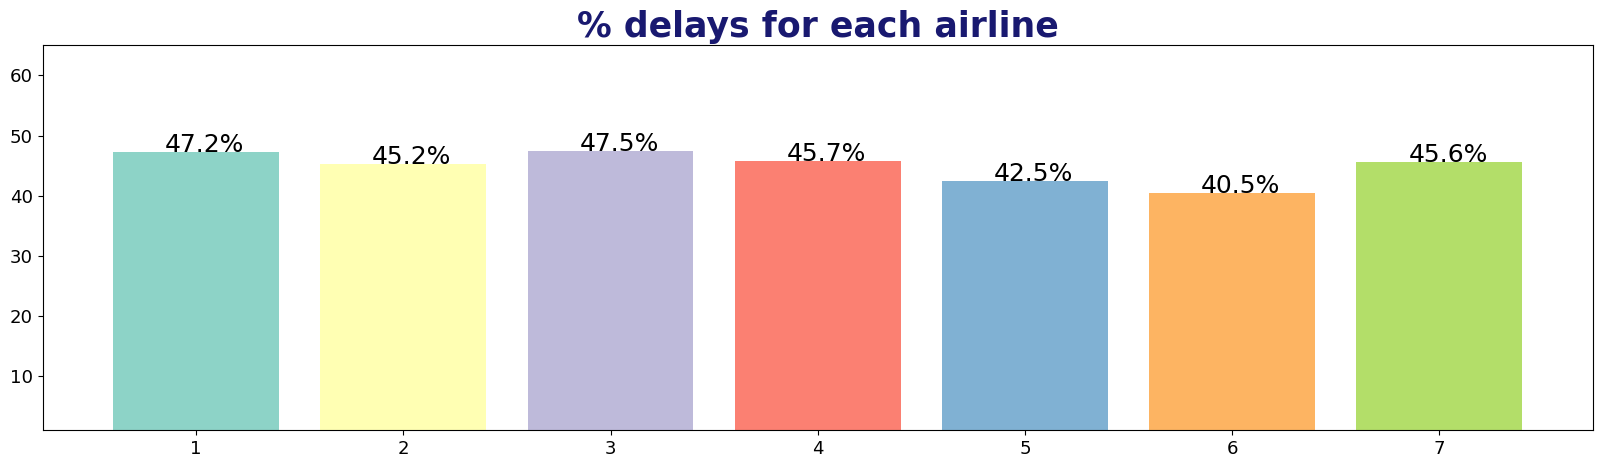

In [90]:
plt.figure(figsize = (20,5))
plt.bar(delay_perc_weekday.index, height = delay_perc_weekday.values, color =plt.get_cmap('Set3').colors)
for v, idx in zip(delay_perc_weekday.values, range(1, len(delay_perc_weekday.index)+1)):
    # print(v, idx)
    plt.annotate('{:.1f}%'.format(v), xy = (idx-0.15, v), size = 18, family ='times')
plt.ylim(1,65)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title('% delays for each airline', size = 25, color = 'midnightblue',weight = 'heavy', family = 'times')
plt.show()

##### c. Which airlines should be recommended for short-, medium-, and long-distance travel?

In [91]:
duration_data = combined_year_hub[['Airline', 'Length', 'Delay']].copy()

In [92]:
duration_data['duration'] = pd.cut(duration_data.Length, 3, labels = ['short','medium', 'long'])
duration_data_grp = duration_data.groupby(['Airline','duration'])['Delay'].agg(
    percent_Delay).reset_index().pivot(index = 'Airline',columns = 'duration').fillna(0)['Delay']
duration_data_grp.columns = duration_data_grp.columns.astype(str)
duration_data_grp.reset_index()

duration,Airline,short,medium,long
0,9E,39.78,0.00,0.00
1,AA,37.32,43.05,60.40
2,AS,32.85,38.67,0.00
3,B6,45.56,51.37,0.00
4,CO,52.87,64.88,66.87
5,DL,43.87,50.29,48.62
6,EV,40.35,50.00,0.00
7,F9,45.40,46.38,0.00
8,HA,30.16,40.48,0.00
9,MQ,34.83,27.42,0.00


In [93]:
duration_data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            558842, 558843, 558844, 558845, 558846, 558847, 558848, 558849,
            558850, 558851],
           dtype='int64', length=556513)

In [94]:
airline_dict

,Airlines ID,Description
0,WN,Southwest
1,DL,Delta
2,OO,Skywest
3,AA,American Airlines
4,MQ,Envoy
...,...,...
683,XNA,Nambour Hospital Helipad
684,YAK,Aussenkehr Airport
685,YAK,Congo Town Airport
686,YAK,Yalkulka Airport


In [95]:
airline_dict.Description = airline_dict.Description.str.strip()
duration_data_grp = pd.merge(duration_data_grp,airline_dict[['Airlines ID','Description']],
                             left_on = 'Airline', right_on = 'Airlines ID',how = 'left')
duration_data_grp

,short,medium,long,Airlines ID,Description
0,39.78,0.00,0.00,9E,Endeavor
1,37.32,43.05,60.40,AA,American Airlines
2,32.85,38.67,0.00,AS,Alaska
3,45.56,51.37,0.00,B6,Jetblue
4,52.87,64.88,66.87,CO,United Airlines (initially CO)
5,43.87,50.29,48.62,DL,Delta
6,40.35,50.00,0.00,EV,ExpressJet
7,45.40,46.38,0.00,F9,Frontier
8,30.16,40.48,0.00,HA,Hawaiian
9,34.83,27.42,0.00,MQ,Envoy


In [96]:
combined_year_hub.Airline.nunique()

17

In [97]:
long = duration_data_grp[duration_data_grp.long == duration_data_grp.long.min()].Description.values.tolist()
print('Airlines with no delays for long flights :\n',', '.join(long))
medium = duration_data_grp[duration_data_grp.medium == duration_data_grp.medium.min()].Description.values.tolist()
print('\nAirlines with no delays for medium flights :\n', ', '.join(medium))
short = duration_data_grp[duration_data_grp.short == duration_data_grp.short.min()].Description.values.tolist()
print('\nAirlines with no delays for short flights :\n', ', '.join(short) )

Airlines with no delays for long flights :
 Endeavor, Alaska, Jetblue, ExpressJet, Frontier, Hawaiian, Envoy, PSA, Skywest, PSA (initially US Airway Express), Southwest, JSX, Mesa

Airlines with no delays for medium flights :
 Endeavor

Airlines with no delays for short flights :
 Mesa


##### d. Do you notice any patterns in the departure times of long-duration flights?

In [98]:
combined_year_hub['duration'] = pd.cut(combined_year_hub.Length, 3, labels =['short', 'medium', 'long'])

In [99]:
combined_year_hub.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport,duration
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,1928.0,24199688.0,24562271.0,short
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,1967.0,21421031.0,24199688.0,medium


In [100]:
pd.crosstab(combined_year_hub.Time, combined_year_hub.duration)['long']

Time
10      0
15      0
20      0
21      0
25      0
       ..
1428    0
1430    0
1431    0
1435    0
1439    0
Name: long, Length: 1131, dtype: int64

In [101]:
y = pd.crosstab(combined_year_hub.Time, combined_year_hub.duration)['long'].index
x = pd.crosstab(combined_year_hub.Time, combined_year_hub.duration)['long'].values

In [102]:
filter_data = combined_year_hub.loc[combined_year_hub.duration == 'long',['Time', 'duration']]

In [103]:
filter_data.Time.describe()

count     559.000000
mean      840.635063
std       221.020092
min       540.000000
25%       670.000000
50%       717.000000
75%      1045.000000
max      1310.000000
Name: Time, dtype: float64

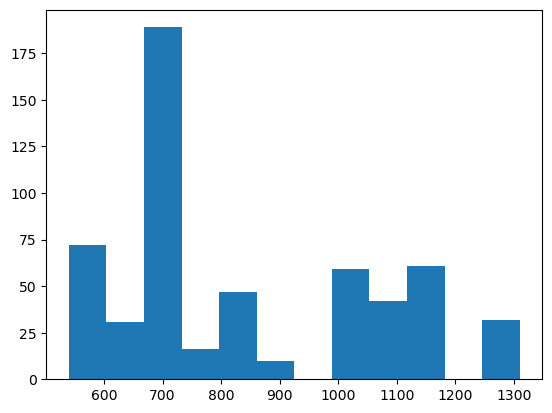

In [104]:
plt.hist(filter_data.Time, bins = 12)
plt.show()

#### 5. Use hypothesis testing strategies to discover:
##### a. If the airport's altitude has anything to do with flight delays for incoming and departing flights

In [ ]:
# H0 : avg elevation for Delayed flights - avg elevation for not Delayed flights = 0 Ha : avg elevationfor Delayed flights - avg elevation for not Delayed flights != 0

In [107]:
sample1 = combined_year_hub[combined_year_hub.Delay == 1].elevation_ft_source_airport
sample2 = combined_year_hub[combined_year_hub.Delay == 0].elevation_ft_source_airport

In [108]:
t, p = stats.ttest_ind(sample1, sample2)

In [109]:
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'

In [110]:
result

'reject null'

In [111]:
# H0 : avg elevation for Delayed flights - avg elevation for not Delayed flights = 0 Ha : avg elevationfor Delayed flights - avg elevation for not Delayed flights != 

In [112]:
sample1 = combined_year_hub[combined_year_hub.Delay == 1].elevation_ft_dest_airport
sample2 = combined_year_hub[combined_year_hub.Delay == 0].elevation_ft_dest_airport

In [113]:
t, p = stats.ttest_ind(sample1, sample2)

In [114]:
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'

In [115]:
result

'reject null'

In [116]:
# Significant difference in avg elevation wrt flight delay for bothincoming and outgoing flights

In [117]:
# Is no. of runway at airport for delayed < for non delayed

In [118]:
 combined_year_hub

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport,duration
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,1928.0,24199688.0,24562271.0,short
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,1967.0,21421031.0,24199688.0,medium
2,3,AA,2400,LAX,DFW,3,20,165,1,large_airport,125.0,4.0,large_airport,607.0,7.0,1926.0,42939104.0,35778573.0,short
3,4,AA,2466,SFO,DFW,3,20,195,1,large_airport,13.0,4.0,large_airport,607.0,7.0,1926.0,24199688.0,35778573.0,short
4,5,AS,108,ANC,SEA,3,30,202,0,large_airport,152.0,3.0,large_airport,433.0,4.0,1932.0,5144467.0,25001762.0,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558847,539377,B6,717,JFK,SJU,5,1439,220,1,large_airport,13.0,4.0,large_airport,9.0,2.0,1998.0,21905309.0,24562271.0,medium
558848,539378,B6,739,JFK,PSE,5,1439,223,1,large_airport,13.0,4.0,medium_airport,29.0,1.0,1998.0,21905309.0,5153276.0,medium
558849,539379,CO,178,OGG,SNA,5,1439,326,0,medium_airport,54.0,2.0,large_airport,56.0,2.0,1928.0,5153276.0,24562271.0,medium
558850,539382,UA,78,HNL,SFO,5,1439,313,1,large_airport,13.0,6.0,large_airport,13.0,4.0,1926.0,13284687.0,24562271.0,medium


In [119]:
s1 = combined_year_hub[combined_year_hub.Delay == 1].runway_count_source_airport
s2 = combined_year_hub[combined_year_hub.Delay == 0].runway_count_source_airport

In [120]:
t, p = stats.ttest_ind(s1, s2)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


In [121]:
s1 = combined_year_hub[combined_year_hub.Delay == 1].runway_count_dest_airport
s2 = combined_year_hub[combined_year_hub.Delay == 0].runway_count_dest_airport

In [122]:
t, p = stats.ttest_ind(s1, s2)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


In [123]:
combined_year_hub.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'type_source_airport',
       'elevation_ft_source_airport', 'runway_count_source_airport',
       'type_dest_airport', 'elevation_ft_dest_airport',
       'runway_count_dest_airport', 'Founded', 'data_2019_source_airport',
       'data_2019_dest_airport', 'duration'],
      dtype='object')

#### 6.Find correlation matrix amongst predictors of flight delay. Create a heatmap to visualize. Share your findings.

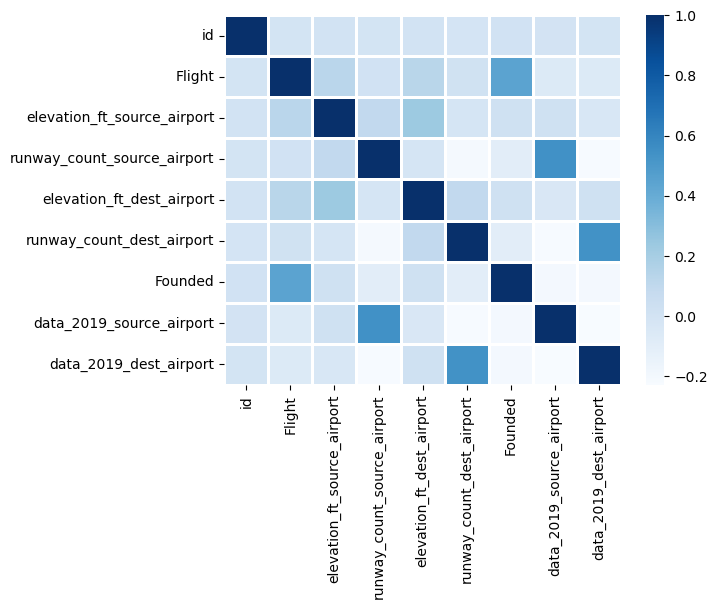

In [132]:
correlation_matix = combined_year_hub.drop(columns = ['DayOfWeek', 'Time','Length', 'Delay',
                                                      'type_source_airport','type_dest_airport']).corr()
sns.heatmap(correlation_matix, cmap='Blues',linecolor='white', linewidths=2)
plt.show()

In [133]:
# Conclusion : avg runway count at destination airport for delayed filghts < avgrunway count at destination airport for delayed filghts for Incoming flights

In [134]:
# Has length, duration of flight, anything to do with flight delays!

In [135]:
# t test
s1 = combined_year_hub[combined_year_hub.Delay == 1].Length
s2 = combined_year_hub[combined_year_hub.Delay == 0].Length

In [131]:
t, p = stats.ttest_ind(s1, s2)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


In [136]:
# there is isgnificant difference

In [137]:
cs = pd.crosstab(combined_year_hub.duration, combined_year_hub.Delay)
cs

Delay,0,1
duration,,
short,274094,219351
medium,31411,31098
long,252,307


In [138]:
chi, p, df, ex = stats.chi2_contingency(cs)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


In [139]:
# t test :
# H0 : avg duration for delayed filghts - avg duration for non delayed flights <= 0
# Ha : avg duration for delayed filghts - avg duration for non delayed flights > 0

In [140]:
t, p = stats.ttest_ind(s1, s2)
if p < 0.05:
    result = 'reject null'
else :
    result = 'fail to reject null'
print(result)

reject null


In [141]:
# avg duration for delayed filghts and non Delayed flights are significantly different.
# - avg duration of flights is less for non delayed flights
# - short duration flights get delayed less.

In [142]:
combined_year_hub.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport,duration
0,1,CO,269,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,1928.0,24199688.0,24562271.0,short
1,2,US,1558,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,1967.0,21421031.0,24199688.0,medium


In [143]:
combined_year_hub.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'type_source_airport',
       'elevation_ft_source_airport', 'runway_count_source_airport',
       'type_dest_airport', 'elevation_ft_dest_airport',
       'runway_count_dest_airport', 'Founded', 'data_2019_source_airport',
       'data_2019_dest_airport', 'duration'],
      dtype='object')

In [144]:
combined_year_hub.to_csv('combined_year_hub.csv', index=False)

# Project Task: Week 1

#### 1. Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

In [145]:
combined_year_hub.isna().sum()

id                             0
Airline                        0
Flight                         0
AirportFrom                    0
AirportTo                      0
DayOfWeek                      0
Time                           0
Length                         0
Delay                          0
type_source_airport            0
elevation_ft_source_airport    0
runway_count_source_airport    0
type_dest_airport              0
elevation_ft_dest_airport      0
runway_count_dest_airport      0
Founded                        0
data_2019_source_airport       0
data_2019_dest_airport         0
duration                       0
dtype: int64

In [146]:
combined_year_hub.drop(columns = ['id', 'Flight', 'duration'], inplace = True)

In [147]:
combined_year_hub.head(2)

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport
0,CO,SFO,IAH,3,15,205,1,large_airport,13.0,4.0,large_airport,97.0,5.0,1928.0,24199688.0,24562271.0
1,US,PHX,CLT,3,15,222,1,large_airport,1135.0,3.0,large_airport,748.0,4.0,1967.0,21421031.0,24199688.0


In [148]:
combined_year_hub.type_dest_airport.unique()

array(['large_airport', 'medium_airport'], dtype=object)

In [149]:
ordinal = OrdinalEncoder(categories=[['medium_airport',
                                      'large_airport'],['medium_airport', 'large_airport']])
ordinal.fit(combined_year_hub[['type_source_airport', 'type_dest_airport']])

OrdinalEncoder(categories=[['medium_airport', 'large_airport'],
                           ['medium_airport', 'large_airport']])

In [150]:
combined_year_hub[['type_source_airport', 'type_dest_airport']] = ordinal.transform(combined_year_hub[['type_source_airport', 'type_dest_airport']])

In [151]:
model_data = combined_year_hub.drop(columns = ['Airline', 'AirportFrom','AirportTo'])

In [152]:
model_data.shape

(556513, 13)

In [153]:
dummy = pd.get_dummies(model_data)
dummy.shape

(556513, 13)

In [154]:
airlines.shape

(518556, 9)

In [155]:
dummy.Founded = 2022 - dummy.Founded

In [156]:
dummy.head(2)

,DayOfWeek,Time,Length,Delay,type_source_airport,elevation_ft_source_airport,runway_count_source_airport,type_dest_airport,elevation_ft_dest_airport,runway_count_dest_airport,Founded,data_2019_source_airport,data_2019_dest_airport
0,3,15,205,1,1.0,13.0,4.0,1.0,97.0,5.0,94.0,24199688.0,24562271.0
1,3,15,222,1,1.0,1135.0,3.0,1.0,748.0,4.0,55.0,21421031.0,24199688.0


#### 2. Perform the following model building steps:
##### a. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree models
##### b. Use the stratified five-fold method to build and validate the models
##### c. Use RandomizedSearchCV for hyperparameter tuning, and use k-fold for crossvalidation
##### d. Keep a few data points (10%) for prediction purposes to evaluate how you would make the final prediction, and do not use this data for testing or validation
##### g. Compare the results of logistic regression and decision tree classifier

In [157]:
model_data.reset_index(drop = True, inplace = True)

In [158]:
np.random.seed(12)
deploy_idx = np.random.choice(model_data.index, replace = False, size = 5000)

In [159]:
deploy = model_data.loc[deploy_idx]

In [160]:
X_deploy = deploy.drop(columns = 'Delay')

In [161]:
model_dev = model_data.loc[~model_data.index.isin(deploy.index)]

In [162]:
deploy.reset_index(drop = True, inplace = True)
model_dev.reset_index(drop = True, inplace = True)

In [163]:
X = model_dev.drop(columns = 'Delay')
y = model_dev.Delay

In [165]:
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=12)
accuracy_train = {}
accuracy_test = {}
final_predictions_sgd = {}
i = 1
for train_index, test_index in folds.split(X,y):
    print('iter ', i)
    
    train, test = model_dev.loc[train_index,], model_dev.loc[test_index,]
    sc = StandardScaler()
    sgd = SGDClassifier()
    
    # define search space
    
    space = dict()
    space['sgd__penalty'] = ['l1', 'l2', 'elasticnet']
    space['sgd__l1_ratio'] = [0,.1,.2,.8,1]
    space['sgd__alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000,10000]
    space['sgd__learning_rate'] = ['constant', 'adaptive']
    space['sgd__eta0']=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1 , 2e-1, 3e-1,5e-1, 8e-1,4e-1, 8e-1, 1, 10, 100]
    
    
    pipe = Pipeline([('sc',sc), ('sgd', sgd)])
    
    # define search
    
    search = RandomizedSearchCV( pipe, space, scoring='accuracy',
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2
                               )
    # execute search
    X_train = train.drop(columns = 'Delay')
    y_train = train.Delay
    
    result = search.fit(X_train, y_train)
    
    train_pred = result.predict(X_train)
    
    
    X_test = test.drop(columns = 'Delay')
    y_test = test.Delay
    test_pred = result.predict(X_test)
    final_predictions_sgd.update({'Fold{}'.format(i):result.predict(X_deploy)})
    
    # get rmse for each fold for train data
    accuracy_train.update({'Fold{}'.format(i): round(accuracy_score(y_true =
                                                                    y_train, y_pred = train_pred)*100,3)})
    accuracy_test.update({'Fold{}'.format(i): round(accuracy_score(y_true =
                                                                   y_test, y_pred = test_pred) * 100,3)})
    i += 1

iter  1
iter  2
iter  3
iter  4
iter  5


In [166]:
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=12)
dt_accuracy_train = {}
dt_accuracy_test = {}
final_predictions_dt = {}
i = 1
for train_index, test_index in folds.split(X,y):
    print('iter ', i)
    
    train, test = model_dev.loc[train_index,], model_dev.loc[test_index,]
    sc = StandardScaler()
    dt = DecisionTreeClassifier()
    
    # define search space
    
    space = dict()
    space['dt__min_samples_split'] = [25000, 30000, 35000, 40000, 45000, 50000,60000 ]
    space['dt__min_samples_leaf'] = [10000, 15000, 20000]
    
    
    pipe = Pipeline([('sc',sc), ('dt', dt)])
    
    # define search
    
    search = RandomizedSearchCV( pipe, space, scoring='accuracy',
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2
                               )
    # execute search
    X_train = train.drop(columns = 'Delay')
    y_train = train.Delay
    
    result = search.fit(X_train, y_train)
    
    train_pred = result.predict(X_train)
    
    
    X_test = test.drop(columns = 'Delay')
    y_test = test.Delay
    test_pred = result.predict(X_test)
    final_predictions_sgd.update({'Fold{}'.format(i):result.predict(X_deploy)})
    
    # get rmse for each fold for train data
    dt_accuracy_train.update({'Fold{}'.format(i): round(accuracy_score(y_true =
                                                                    y_train, y_pred = train_pred)*100,3)})
    dt_accuracy_test.update({'Fold{}'.format(i): round(accuracy_score(y_true =
                                                                   y_test, y_pred = test_pred) * 100,3)})
    i += 1

iter  1
iter  2
iter  3
iter  4
iter  5


In [168]:
# compare results :
train_results = pd.DataFrame ({'sgd' : accuracy_train.values(), 'dt':dt_accuracy_train.values() },
                              index = ['Fold {}'.format(i) for i in range(1,6)])
train_results

,sgd,dt
Fold 1,56.882,61.494
Fold 2,56.995,61.479
Fold 3,56.970,61.478
Fold 4,56.969,61.317
Fold 5,56.936,61.619


In [169]:
test_results = pd.DataFrame ({'sgd' : accuracy_test.values(), 'dt':dt_accuracy_test.values() },
                             index = ['Fold {}'.format(i) for i in range(1,6)])
test_results

,sgd,dt
Fold 1,57.095,61.639
Fold 2,56.833,61.404
Fold 3,56.897,61.565
Fold 4,56.933,61.412
Fold 5,57.044,61.267


In [ ]:
# getting accuracies for final predictions

In [171]:
final_predictions_dt

NameError: name 'final_predictions_dt' is not defined

In [172]:
final_predictions_sgd

{'Fold1': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Fold2': array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 'Fold3': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'Fold4': array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 'Fold5': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

#### 3. Use the stratified five-fold method to build and validate the models using the XGB classifier, compare all methods, and share your findings

In [180]:
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state=12)
xgb_accuracy_train = {}
xgb_accuracy_test = {}
final_predictions_xgb = []

i = 1

for train_index, test_index in folds.split(X,y):
    print('iter ', i)
    
    train, test = model_dev.loc[train_index,], model_dev.loc[test_index,]
    sc = StandardScaler()
    xgb_r = XGBClassifier(random_state = 12, use_label_encoder = False)
    
    # define search space
    space = dict()
    space['xgb_r__n_estimators'] = [40,50,60]
    space['xgb_r__max_depth'] = [3,4,5]
    space['xgb_r__colsample_bytree']:[0.4,.5,.6]
    space['xgb_r__lambda'] = [.0001,.002,.0004,.0003]
    space['xgb_r__alpha'] = [.01,.02,.1,.4]
    
    pipe = Pipeline([('sc',sc), ('xgb_r', xgb_r)])
    
    # define search
    
    search = RandomizedSearchCV( pipe, space,
                                scoring='neg_root_mean_squared_error',
                                cv=5, refit=True, return_train_score = True,
                                random_state = 12, n_jobs = -1, n_iter = 2
                               )
    
    # execute search
    
    X_train = train.drop(columns = 'Delay')
    y_train = train.Delay
    
    result = search.fit(X_train, y_train)
    
    train_pred = result.predict(X_train)
    
    X_test = test.drop(columns = 'Delay')
    
    y_test = test.Delay
    
    test_pred = result.predict(X_test)
    
    final_predictions_xgb.append(result.predict(X_deploy))
    
    # get rmse for each fold for train data
    
    xgb_accuracy_train.update({'Fold{}'.format(i): round(accuracy_score(y_true= y_train, y_pred = train_pred),3)})
    xgb_accuracy_test.update({'Fold{}'.format(i): round(accuracy_score(y_true =y_test, y_pred = test_pred),3)})
    i += 1

iter  1


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  2


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  3


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  4


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


iter  5


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [181]:
xgb_accuracy_train

{'Fold1': 0.646,
 'Fold2': 0.645,
 'Fold3': 0.647,
 'Fold4': 0.646,
 'Fold5': 0.646}

In [182]:
xgb_accuracy_train

{'Fold1': 0.646,
 'Fold2': 0.645,
 'Fold3': 0.647,
 'Fold4': 0.646,
 'Fold5': 0.646}

In [183]:
train_results['xgb'] = xgb_accuracy_train.values()
test_results['xgb'] = xgb_accuracy_test.values()

In [184]:
train_results

,sgd,dt,xgb
Fold 1,56.882,61.494,0.646
Fold 2,56.995,61.479,0.645
Fold 3,56.970,61.478,0.647
Fold 4,56.969,61.317,0.646
Fold 5,56.936,61.619,0.646


In [185]:
test_results

,sgd,dt,xgb
Fold 1,57.095,61.639,0.644
Fold 2,56.833,61.404,0.643
Fold 3,56.897,61.565,0.644
Fold 4,56.933,61.412,0.645
Fold 5,57.044,61.267,0.643
